<a href="https://colab.research.google.com/github/gonzalojaimovitch/P3-Machine-Teaching/blob/master/GeneralExperimentSettingProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload res7.txt file from The Teaching Size P3 Experiments
 
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving filteredprogsTS7Cleaned.txt to filteredprogsTS7Cleaned.txt
Saving res7.txt to res7.txt


In [ ]:
#Upload res7.txt and filteredprogsTS7Cleaned.txt and delete extra information
#filteredprogsTS7Cleaned.txt was preprocessed using Query Editor on Microsoft Office Excel

res7data = uploaded["res7.txt"].decode("utf-8").split("\n")
filtered7data = uploaded["filteredprogsTS7Cleaned.txt"].decode("utf-8").split("\n")

for i in range(len(res7data)):
 res7data[i] = res7data[i].split(":")

del(res7data[0])

del(res7data[0])

del(res7data[len(res7data)-1])

for i in range(len(filtered7data)):
  filtered7data[i] = filtered7data[i].replace("\r","").split("\t")

del(filtered7data[0])

del(filtered7data[len(filtered7data)-1])

print(res7data)
print(filtered7data)



In [ ]:
#Create a list (iolist) with the input output pairs from res7.txt and perform some data cleaning

iolist = ['']*len(res7data)

for i in range(0, len(res7data)):
  iolist[i] = res7data[i][1].split("),")
  for j in range(0, len(iolist[i])):
    iolist[i][j] = iolist[i][j].replace("(","").replace(")","").replace(" ","").replace("'", "").split(",")
    if iolist[i][j] != ['']:
      iolist[i][j] = tuple(iolist[i][j])
    else:
      del iolist[i][j]

print(iolist)
  

In [ ]:
#Create a list of lists (teachingSet) containing the witnesses for each program, deleting the repeated pairs

program = ""
teachingSet = ['']*len(filtered7data)
programSet = ['']*len(filtered7data)
witnessSet = ['']*len(filtered7data)

#We can assume that when the if condition is true in the third loop, that pair will be part of the witness set. However, there can be more pairs in 
#the witness set. So this variable will help adding the extra pairs which are part of the witness set

witnessSetAdder = [0,0]


#Another assumption is that the witness set is composed by the first appereance of the program in the 'res7.txt' file (read last code space comment)
for i in range(0, len(filtered7data)):
  program = filtered7data[i][0]
  for j in range(0, len(res7data)):
    #The programs in res7data have an space as the first character. Easier to handle like this (for me :D)
    if res7data[j][2] == (" " + program):
      for k in range(0, len(iolist[j])):
        if teachingSet[i] == '':
          teachingSet[i] = [iolist[j][k]]
          programSet[i] = program
          witnessSet[i] = [iolist[j][k]] 
          witnessSetAdder = [i,j]
        else:
          if iolist[j][k] not in teachingSet[i]:
            teachingSet[i].append(iolist[j][k])
            if witnessSetAdder[0] == i and witnessSetAdder[1] == j:
              witnessSet[i].append(iolist[j][k])

In [ ]:
#Different program lengths in 'res7.txt'

for j in range(0, 15):
  print(str(j)+ " " + str(sum(1 for i in programSet if len(i) == j)))

0 0
1 1
2 4
3 12
4 35
5 97
6 269
7 577
8 898
9 1131
10 1031
11 643
12 268
13 96
14 0


[Text(0, 0.5, 'Redundant Example Average'), Text(0.5, 0, 'Size of programs')]

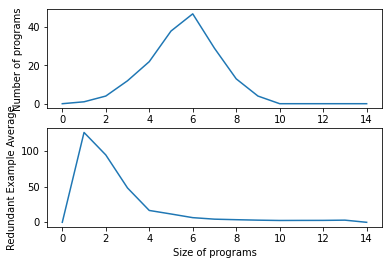

In [ ]:
#This block of code can be ignored since it is not (for the moment) relevant. It consists of two plots explaining the number of programs by the size and the
#average number of redundant examples by the size of the programs. 

import matplotlib.pyplot as plt
import statistics

size = ['']*15
number = ['']*15

examples = ['']*15

counter = []

for i in range(0,len(programStratComplete)):
  size[i] = i
  number[i] = len(programStratComplete[i])

  

  for i in range(0,len(programStratComplete)):
    try:
      for j in range(0,len(teachingSet)):
        if len(programSet[j]) == i:
          counter.append(len(teachingSet[j]))
      examples[i] = statistics.mean(counter)
      counter = []
    except (statistics.StatisticsError):
      examples[i] = 0
      continue

ig, axs = plt.subplots(2)
axs[0].plot(size, number)
axs[0].set(xlabel = 'Size of programs', ylabel = 'Number of programs')
axs[1].plot(size, examples)
axs[1].set(xlabel = 'Size of programs', ylabel = 'Redundant Example Average')


In [ ]:
#Delete those programs whose total number of pairs is lower than a given number (minPairsNumber) without considering the witness set

length = len(teachingSet)
i = 0
minPairsNumber = 10

while i < length:
  if (len(teachingSet[i])-len(witnessSet[i])) < minPairsNumber:
    del teachingSet[i]
    del programSet[i]
    del witnessSet[i]
    length = length - 1 
  else:
    i = i + 1
    


In [ ]:
#Check length of programs

programStratComplete = [''] * 15

print("Programs in filteredprogsTS7 with " + str(minPairsNumber) + " or more redundant examples")
for i in range(0,len(programStratComplete)):
  programStratComplete[i] = []
  for j in range(0,len(programSet)):
    if len(programSet[j]) == i:
      programStratComplete[i].append(programSet[j])
  print("  Programs with length " + str(i) + ": " + str(len(programStratComplete[i])))


Programs in filteredprogsTS7 with 10 or more redundant examples
  Programs with length 0: 0
  Programs with length 1: 1
  Programs with length 2: 4
  Programs with length 3: 12
  Programs with length 4: 22
  Programs with length 5: 38
  Programs with length 6: 47
  Programs with length 7: 29
  Programs with length 8: 13
  Programs with length 9: 4
  Programs with length 10: 0
  Programs with length 11: 0
  Programs with length 12: 0
  Programs with length 13: 0
  Programs with length 14: 0


In [ ]:
#Perform the stratified sampling

import random

###UPDATE!!! (16/07) Finally the requirement of examples is 5 examples and not 10, but since a lot of work has been done with the below sampling and since 
#there will be bias anyway, the first results are maintained

totalProgLengths = 9

expProgsNum = 9

seed = 23

sample = []


for i in range(1,expProgsNum + 1):
  random.seed(seed)
  sample.append(programStratComplete[i][random.randint(0,len(programStratComplete[i])-1)])


#Create a list with all the sampleNum programs sampled for the experiment

for i in range(1, expProgsNum + 1):
  probability = (1/totalProgLengths)*(1/len(programStratComplete[i]))
  #probability = (1/len(programStratComplete[i]))*(len(programStratComplete[i])/len(filtered7data)))
  print("Program with length " + str(i) +": "+ str(sample[i-1])+"   Probability = " + str(probability))

Program with length 1: o   Probability = 0.1111111111111111
Program with length 2: >o   Probability = 0.027777777777777776
Program with length 3: >+o   Probability = 0.009259259259259259
Program with length 4: o+oo   Probability = 0.00505050505050505
Program with length 5: >>>-o   Probability = 0.0029239766081871343
Program with length 6: >-[o<]   Probability = 0.002364066193853428
Program with length 7: -[-<]>o   Probability = 0.0038314176245210726
Program with length 8: +[>+o<+]   Probability = 0.008547008547008548
Program with length 9: -[-[o<-]]   Probability = 0.027777777777777776


In [ ]:
#Show the obtained results in an aggregated manner (down below the information will be disaggregated)

resultsList = [""]*len(sample)

for i in range(0, len(sample)):
  for j in range(0, len(programSet)):
    if programSet[j] == sample[i]:
      resultsList[i] = [i+1, programSet[j],witnessSet[j],teachingSet[j]]


In [ ]:
#In some cases, the witness set in the file 'filteredprogsTS7.txt' matches the witness set linked to the first program appereance in the 
#'res7.txt' file. Nonetheless, there are some cases where this assumption doesn't happen. For instance:

#Program: >>0
#Witness set (according to 'filteredprogsTS7.txt'): (('010', '0'), ('1', ''))
#Witness set (according to the first 'res7.txt' file appereance assumption): (('0', ''), ('010', '0'))

#Finally I stayed with the first appereance from 'res7.txt'

#!!!!!!!!!!!!!!!!
#In 'res7.txt', when one of these cases appears: (('', '0'),)... I was treating the right side of the comma or the second element of the main tuple as 
#('',). This is such a mistake, since for example, in the case of program '+ooo', the code found (('', '000'), ('',)) as the witness set, which is a 
#contradiction. The solution is added 26/6


from tabulate import tabulate
print(tabulate(resultsList, headers=['Number','Program', 'Witness Set ', 'Teaching Set']))

  Number  Program    Witness Set                          Teaching Set
--------  ---------  -----------------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Choose randomly the examples of the Teaching Set (without considering the witness set) that will be part of the additional examples or the examples to label
#in the experiment. 

#UPDATE!!! (16/07) Finally the example to label or test examples will not be retrieved from 'res7t.txt'. As explained above, the project was in such an advanced
#phase when this change was decided, so this procedure will not be modified to addapt it for just 5 randomly sampled examples. Anyway, the 5 examples will be 
#chosen randomly, which is the desired way to proceed. 

#10 examples will be randomly chosen from the Teaching Set. After that, 5 examples will be chosen out of the 10 sampled examples and will be part of the 
#additional learning examples for the experiment. 

#First, the witnessSet must be deleted before doing the sampling
for i in range(0, len(resultsList)):
  length = len(resultsList[i][3])
  j = 0
  while j < length:
    if resultsList[i][3][j] in resultsList[i][2]:
      del resultsList[i][3][j]
      length = length - 1
    else:
      j = j + 1
  print(resultsList[i][3])
    

numExamples = 10

teachingSet = 5

teachingSet1 = 2

teachingSet2 = 3

unlabeledSet = 5

#sampledExampleSet will be formed by the 10 randomly sampled examples from the teachingSet without considering the witnessSet before they are separated into
#redundant/test examples
sampledExampleSet = ['']*len(resultsList)

#sampledTeachingSet will be formed by the 5 examples from the Teaching Set which will be part of the additional examples. Then, they are separared into 
#the two first additional examples and the three second additional examples (sampledTeachingSet1 and sampledTeachingSet2)
sampledTeachingSet = ['']*len(resultsList)
sampledTeachingSet1 = ['']*len(resultsList)
sampledTeachingSet2 = ['']*len(resultsList)

#sampledUnlabeledSet will be formed by the 5 examples from the Teaching Set which will be part of the unlabeled examples
sampledUnlabeledSet = ['']*len(resultsList)

import random

seed = 23


for i in range(0, len(resultsList)):
  random.seed(seed)
  sampledExampleSet[i] = random.sample(resultsList[i][3],k=numExamples)
  random.seed(seed)
  sampledTeachingSet[i] = random.sample(sampledExampleSet[i], k=teachingSet)
  random.seed(seed)
  sampledTeachingSet1[i] = random.sample(sampledTeachingSet[i], k=teachingSet1)

  sampledTeachingSet2[i] = list(set(sampledTeachingSet[i])-set(sampledTeachingSet1[i]))
  sampledUnlabeledSet[i] = list(set(sampledExampleSet[i])-set(sampledTeachingSet[i]))

#Printed results are the population of 'res7.txt' witness sets for each concept eliminating the first appereance (which will be used as the final witness set)

[('1', '1'), ('00', '0'), ('01', '0'), ('10', '1'), ('11', '1'), ('000', '0'), ('001', '0'), ('010', '0'), ('011', '0'), ('100', '1'), ('101', '1'), ('110', '1'), ('111', '1'), ('0000', '0'), ('0001', '0'), ('0010', '0'), ('0011', '0'), ('0100', '0'), ('0101', '0'), ('0110', '0'), ('0111', '0'), ('1000', '1'), ('1001', '1'), ('1010', '1'), ('1011', '1'), ('1100', '1'), ('1101', '1'), ('1110', '1'), ('1111', '1'), ('00000', '0'), ('00001', '0'), ('00010', '0'), ('00011', '0'), ('00100', '0'), ('00101', '0'), ('00110', '0'), ('00111', '0'), ('01000', '0'), ('01001', '0'), ('01010', '0'), ('01011', '0'), ('01100', '0'), ('01101', '0'), ('01110', '0'), ('01111', '0'), ('10000', '1'), ('10001', '1'), ('10010', '1'), ('10011', '1'), ('10100', '1'), ('10101', '1'), ('10110', '1'), ('10111', '1'), ('11000', '1'), ('11001', '1'), ('11010', '1'), ('11011', '1'), ('11100', '1'), ('11101', '1'), ('11110', '1'), ('11111', '1'), ('000000', '0'), ('000001', '0'), ('000010', '0'), ('000011', '0'), ('0

In [ ]:
#Disaggregation of the Teaching Set from resultsList after the sampling. Remember that the 'Unlabeled Set' will not be used as the test examples

resultsList2 = [""]*len(resultsList)

for i in range(0, len(resultsList2)):
  resultsList2[i] = [resultsList[i][0], resultsList[i][1], resultsList[i][2], sampledTeachingSet1[i], sampledTeachingSet2[i], sampledUnlabeledSet[i]]

from tabulate import tabulate
print(tabulate(resultsList2, headers=['Number','Program', 'Witness Set', 'Teaching Set 1', 'Teaching Set 2', 'Unlabeled Set']))


  Number  Program    Witness Set                          Teaching Set 1                      Teaching Set 2                                      Unlabeled Set
--------  ---------  -----------------------------------  ----------------------------------  --------------------------------------------------  ----------------------------------------------------------------------------------
       1  o          [('0', '0')]                         [('111001', '1'), ('110101', '1')]  [('100110', '1'), ('01010', '0'), ('111100', '1')]  [('101', '1'), ('01', '0'), ('101101', '1'), ('001110', '0'), ('01000', '0')]
       2  >o         [('10', '0')]                        [('01000', '1'), ('01010', '1')]    [('1011', '0'), ('00', '0'), ('001', '0')]          [('00011', '0'), ('11001', '1'), ('00000', '0'), ('100110', '0'), ('101110', '0')]
       3  >+o        [('', '0'), ('01', '')]              [('010100', ''), ('10101', '1')]    [('010', ''), ('100', '1'), ('011101', '')]         [('010110', 

In [ ]:
import math
import random
from copy import deepcopy

def generate_binary2(n):

  # 2^(n-1)  2^n - 1 inclusive
  bin_arr = range(0, int(math.pow(2,n)))
  bin_arr = [bin(i)[2:] for i in bin_arr]

  # Prepending 0's to binary strings
  max_len = len(max(bin_arr, key=len))
  bin_arr = [i.zfill(max_len) for i in bin_arr]

  return bin_arr

#population includes the different strings formed by 0s and 1s from lengths 0 to 7. For example, '0' or '000' or '01111'

numMax = 5

population = ['']

resultsList2Input = deepcopy(resultsList2)

#This loop will create the chosen population for the test examples. In this case, all the possible 0s and 1s strings with the maximum lenght of 'numMax'


for i in range(0, numMax):
  population = population + generate_binary2((i + 1))


#The following loops will get the [0] element of the tuple (a.k.a the input of the examples)


for i in range(0, len(resultsList2Input)):
  for j in range(0, len(resultsList2Input[i][2])):
    resultsList2Input[i][2][j] = resultsList2Input[i][2][j][0]

  for j in range(0, len(resultsList2Input[i][3])):
    resultsList2Input[i][3][j] = resultsList2Input[i][3][j][0]

  for j in range(0, len(resultsList2Input[i][4])):
    resultsList2Input[i][4][j] = resultsList2Input[i][4][j][0]


#After submitting the form v2 I realized that the 'difference' operation over the sets can vary the order of the list obtained, so even if the seed is fixed, the
#results will vary depending on the moment of the execution. So I comment the last loop assuming the results are the ones handwritten.

seed = 23

#for i in range(0, len(resultsList2Input)):
# random.seed(seed)
# resultsList2Input[i][5] = random.sample(list(set(population)-set(resultsList2Input[i][2]+resultsList2Input[i][3]+resultsList2Input[i][4])),numMax)
# print('Test Examples C' + str(i + 1) + ': ' + str(resultsList2Input[i][5]))

resultsList2Input[0][5] = ['00000', '11100', '00111', '11010', '0010']
resultsList2Input[1][5] = ['01011', '0101', '0010', '100', '1']
resultsList2Input[2][5] = ['00010', '110', '00111', '11000', '101']
resultsList2Input[3][5] = ['01011', '0101', '0010', '100', '1']
resultsList2Input[4][5] = ['01011', '110', '0010', '101', '1000']
resultsList2Input[5][5] = ['01', '0000', '00011', '0011', '1000']
resultsList2Input[6][5] = ['01011', '0000', '00000','100', '1000']
resultsList2Input[7][5] = ['10101', '11101', '00000', '0011', '1111']
resultsList2Input[8][5] = ['10101', '0100', '00000', '01000', '1111']

for i in range(0, len(resultsList2Input)):
  print('Test Examples C' + str(i + 1) + ': ' + str(resultsList2Input[i][5]))



Test Examples C1: ['00000', '11100', '00111', '11010', '0010']
Test Examples C2: ['01011', '0101', '0010', '100', '1']
Test Examples C3: ['00010', '110', '00111', '11000', '101']
Test Examples C4: ['01011', '0101', '0010', '100', '1']
Test Examples C5: ['01011', '110', '0010', '101', '1000']
Test Examples C6: ['01', '0000', '00011', '0011', '1000']
Test Examples C7: ['01011', '0000', '00000', '100', '1000']
Test Examples C8: ['10101', '11101', '00000', '0011', '1111']
Test Examples C9: ['10101', '0100', '00000', '01000', '1111']


In [ ]:
#Get the outputs of the test examples using the P3 Simulator

alphabet = {'1','0','.'};
operators = {'<','>','+','-','o','[',']'}
 
inList = []
progList = []
 
inPointer = 0
progPointer = 0
 
output = ''

def runP3(input, program):
 
  #Check if the values given are correct 
  checkInput(input)
  checkProgram(program)
 
  #Create lists 
  if input == '':
    inList = ['.']
  else:
    inList = list(input)
 
  progList = list(program)
 
  #Initialize pointers
  inPointer = 0
  progPointer = 0

  #Initialize left padding controller
  leftPad = False
 
  output = ''
 
  #Start!
 
  while(True):
 
    #Check if program ends
    if progPointer > (len(progList)-1):
      return output
 
    pointedOp = progList[progPointer]
 
    #Choose Instruction
    if pointedOp == "<":
 
      if inPointer > 0:        
        inPointer = inPointer - 1
      elif leftPad == False:
        #Not necessary to change the pointer since it will stay as 0
        inList.insert(0,'.')
        leftPad = True
      progPointer = progPointer + 1    
 
 
    elif pointedOp == ">":
 
      if inPointer < (len(inList) - 1):
        inPointer = inPointer + 1
      else:
        inList.append('.')
        inPointer = inPointer + 1
 
      progPointer = progPointer + 1
 
 
    elif pointedOp == "+":
 
      val = inList[inPointer]
 
      if val == '0':
        inList[inPointer]='1'
      elif val == '1':
        inList[inPointer]='.'
      else: inList[inPointer]='0' 
 
      progPointer = progPointer + 1
 
 
    elif pointedOp == "-":
 
      val = inList[inPointer]
 
      if val == '0':
        inList[inPointer]='.'
      elif val == '1':
        inList[inPointer]='0'
      else: inList[inPointer]='1'
 
      progPointer = progPointer + 1
 
        
    elif pointedOp == "o":
 
      if inList[inPointer] != '.':
        output = output + inList[inPointer]
      else:
        progPointer = len(progList)
 
      progPointer = progPointer + 1
    
  
    elif pointedOp == "[":
 
      if inList[inPointer] == '.':    
        cond = len(progList)
        i = (progPointer + 1)
        while i < cond:
          if progList[i] == "]":
            progPointer = i
            cond = i
          i = i + 1
        
      else:
        progPointer = progPointer + 1      
 
       
    elif pointedOp == "]":
 
 
      if inList[inPointer] != '.':
        cond = -1
        i = (progPointer - 1)
        while i > cond:
          if progList[i] == "[":
            progPointer = i
            cond = i
          i = i - 1
      else:
        progPointer = progPointer + 1

 
def checkInput(string):
  for c in string:
    if c not in alphabet:
      print("Incorrect input")
      exit()
 
def checkProgram(string):
  for c in string:
    if c not in operators:
      print("Incorrect program")
      exit()




for i in range(0, len(resultsList2Input)):
  for j in range(0, len(resultsList2Input[i][5])):
    resultsList2Input[i][5][j] = (resultsList2Input[i][5][j],runP3(resultsList2Input[i][5][j],resultsList2Input[i][1]))

  print(resultsList2Input[i][5])

[('00000', '0'), ('11100', '1'), ('00111', '0'), ('11010', '1'), ('0010', '0')]
[('01011', '1'), ('0101', '1'), ('0010', '0'), ('100', '0'), ('1', '')]
[('00010', '1'), ('110', ''), ('00111', '1'), ('11000', ''), ('101', '1')]
[('01011', '011'), ('0101', '011'), ('0010', '011'), ('100', '1'), ('1', '1')]
[('01011', '0'), ('110', '1'), ('0010', ''), ('101', '1'), ('1000', '')]
[('01', '00'), ('0000', ''), ('00011', ''), ('0011', ''), ('1000', '')]
[('01011', '1'), ('0000', '0'), ('00000', '0'), ('100', ''), ('1000', '')]
[('10101', ''), ('11101', ''), ('00000', '1'), ('0011', '1'), ('1111', '')]
[('10101', ''), ('0100', ''), ('00000', ''), ('01000', ''), ('1111', '')]
